In [3]:
import numpy as np
import pandas as pd

data = pd.read_csv('data_3_1_1.csv').to_numpy()

x = data[:, :-1]
y = data[:, -1]

print('x', x.shape)
print('y', y.shape)

# change class label 0 to -1
y = np.where(y == 0, -1, 1)
print('y', y)

# Split 70% for training set, 30% for testing set
n = len(x)
n_train = int(n * 0.7)
n_test = n - n_train

x_train = x[:n_train]
y_train = y[:n_train]
print('x_train', x_train.shape)
print('y_train', y_train.shape)

x_test = x[n_train:]
y_test = y[n_train:]
print('x_test', x_test.shape)
print('y_test', y_test.shape)


x (100, 2)
y (100,)
y [ 1  1  1 -1  1  1 -1 -1  1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1
  1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1 -1 -1 -1  1  1
  1  1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1  1  1  1 -1 -1 -1
  1  1  1  1  1 -1 -1 -1  1  1 -1 -1  1  1  1  1 -1  1 -1 -1  1 -1 -1  1
 -1  1  1 -1]
x_train (70, 2)
y_train (70,)
x_test (30, 2)
y_test (30,)


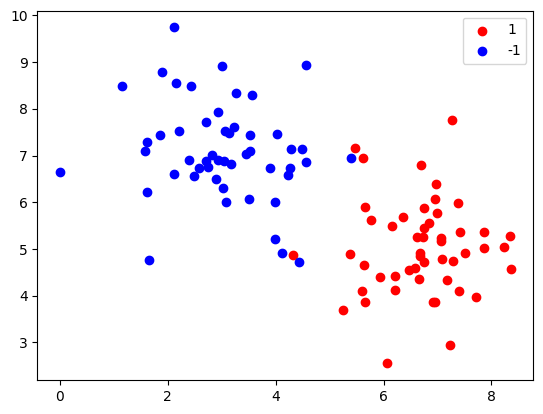

In [42]:
# Plot data points
import matplotlib.pyplot as plt
x1 = x[y == 1]
x2 = x[y == -1]
plt.scatter(x1[:, 0], x1[:, 1], color='r', label='1')
plt.scatter(x2[:, 0], x2[:, 1], color='b', label='-1')
plt.legend()
plt.show()

## Create a model

In [16]:
import torch
import torch.nn as nn

class MyModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(2, 1)

  def forward(self, x):
    """
    x: tensor(m, 2)
    return: tensor(m)
    """
    output = self.linear(x)
    return output.flatten()

tmp = torch.randn(100, 2)
model = MyModel()
#output = model.forward(tmp)
output = model(tmp)

print('output', output.shape)

output torch.Size([100])


## Training with Hinge Loss

In [51]:
import torch.optim as optim

model = MyModel()

# opt = optim.SGD(model.parameters(), lr=1)

# Use Adam optimizer
# weight_decay is L2 regularization
opt = optim.Adam(model.parameters(), lr=0.1, weight_decay=0.01)

tx = torch.tensor(x_train, dtype=torch.float32)
ty = torch.tensor(y_train, dtype=torch.float32)


# Train the model using Hinge loss function
# Save J for ploting
J_list = []
for i in range(5000):
  tz = model(tx)
  # J = torch.clamp(1 - ty*tz, min=0)
  J = torch.clamp(1 - ty*tz, min=0)
  J = J.mean()
  J.backward()

  opt.step() # update gradient
  opt.zero_grad()  # reset gradient

  J_list.append(J.item())
  print('iter: %d, J: %f' % (i, J.item()))
  
  # Check if it's converged
  if J.item() < 0.01:
    print('Converged')
    break
  



iter: 0, J: 4.309332
iter: 1, J: 3.698560
iter: 2, J: 3.087797
iter: 3, J: 2.477046
iter: 4, J: 1.866314
iter: 5, J: 1.279175
iter: 6, J: 1.183030
iter: 7, J: 1.114237
iter: 8, J: 1.333149
iter: 9, J: 1.510272
iter: 10, J: 1.555008
iter: 11, J: 1.500659
iter: 12, J: 1.369011
iter: 13, J: 1.175332
iter: 14, J: 0.930846
iter: 15, J: 0.647705
iter: 16, J: 0.395274
iter: 17, J: 0.365161
iter: 18, J: 0.473542
iter: 19, J: 0.542832
iter: 20, J: 0.538011
iter: 21, J: 0.466576
iter: 22, J: 0.342499
iter: 23, J: 0.216616
iter: 24, J: 0.146204
iter: 25, J: 0.141964
iter: 26, J: 0.167956
iter: 27, J: 0.201141
iter: 28, J: 0.216904
iter: 29, J: 0.213578
iter: 30, J: 0.194262
iter: 31, J: 0.168069
iter: 32, J: 0.146848
iter: 33, J: 0.128014
iter: 34, J: 0.113794
iter: 35, J: 0.107277
iter: 36, J: 0.105015
iter: 37, J: 0.105823
iter: 38, J: 0.112556
iter: 39, J: 0.118104
iter: 40, J: 0.122477
iter: 41, J: 0.121811
iter: 42, J: 0.117318
iter: 43, J: 0.112104
iter: 44, J: 0.106035
iter: 45, J: 0.10314

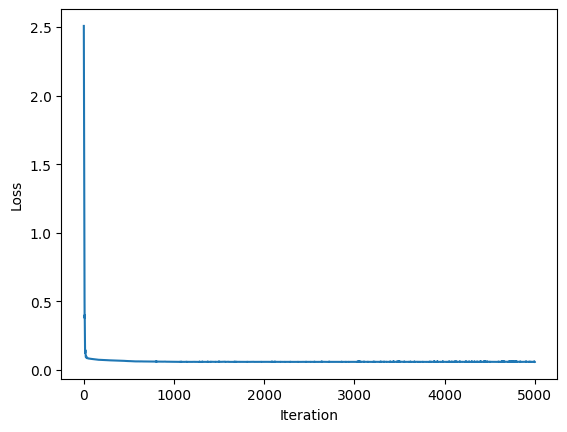

In [40]:
# Plot the loss curve
import matplotlib.pyplot as plt
plt.plot(J_list)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

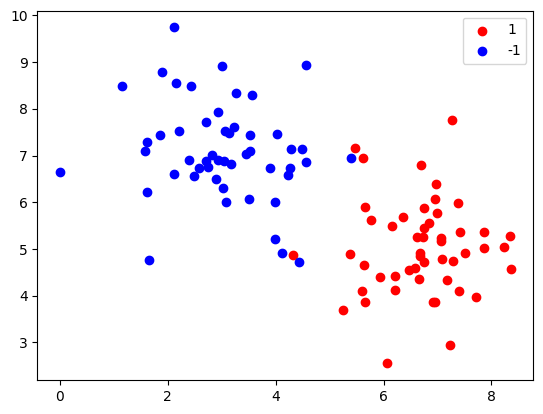

In [49]:
# Plot data point and decision boundary
import matplotlib.pyplot as plt


## Evaluating the model

In [41]:
test_x = torch.tensor(x_test, dtype=torch.float32)
test_y = torch.tensor(y_test, dtype=torch.float32)

tz = model(test_x)
tz[tz >= 0] = 1
tz[tz < 0] = -1
accuracy = (tz == test_y).float().mean()
print('Accuracy rate: %.4f' % accuracy.item())

Accuracy rate: 0.5333
